<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center> Ensemble Technique and Model Tuning - Week 3 </center></h1>

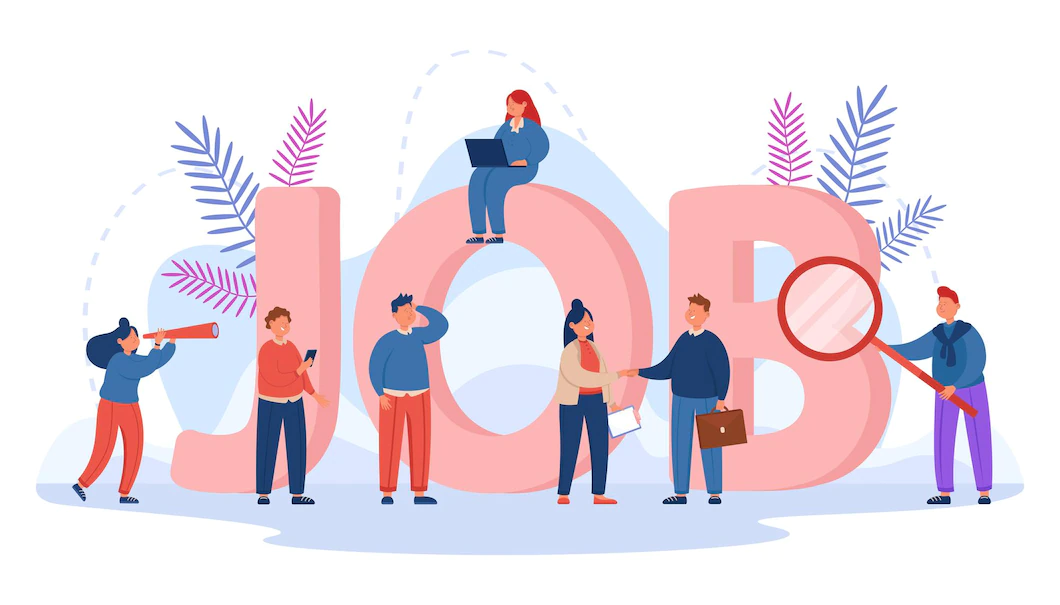

<b><h2><center>Job Change Prediction</center></h2></b>

## Problem Statement

### Businees Context

The Ed Tech companies working on data science usually receive many
registrations for the training programs of the companies before officially
giving them a permanent role. Among those trainees, the companies want
to know which candidates are really want to work for them or will look
for a new employment after training time. This will help to reduce the
training cost, and bring higher levels of satisfaction and retention. This
work is performed to interpret the main factors impacting to candidate
decision and then build a prediction model to predict the probability of a
candidate will look for a new job or will work for the company using the
current credentials, demographics, experience data, etc.

### Objective
Ed Tech company wants to predict the likelihood of the candidates with
the intention to leave or do not leave the company after training periods. As data scientist at this Ed Tech company,you need to work on these and interpret the main factors impacting to candidate decision
and then build a prediction model to predict the probability of a candidate will
look for a new job or will work for the company using the current credentials,
demographics, experience data, etc.


### Data Description

* enrollee_id: Unique ID for the candidate

* city: City code

* city_ development _index: Development index of the city (scaled)

* gender: Gender of the candidate

* relevent_experience: Relevant experience of the candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline: Education major discipline of the candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type: Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for a job change, 1 – Looking for a job change


#### What is City Development Index?

* The City Development Index was developed for the Second United Nations Conference on Human Settlements (Habitat II) in 1996 and measures the level of development in cities. The Urban Indicators Programme of the United Nations Human Settlements Programme (UN-Habitat) developed the indicator so that they could rank cities of the world according to their level of development and as a display of indicators depicting development. The CDI cuts across the different clusters identified in the Urban Indicator Framework as it is based on five sub-indices namely, infrastructure, waste, health, education, and city product. It is useful as it provides a snap-shot view of how cities are doing concerning the different indices

### Importing necessary libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading the dataset

In [ ]:
job = pd.read_csv("jobs_data.csv")

In [ ]:
# Checking the number of rows and columns in the data
job.shape

(19158, 14)

* The dataset has 19158 rows and 14 columns

## Data Overview

In [ ]:
# let's create a copy of the data
df = job.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.000
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.000
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.000
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.000
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.000


In [ ]:
# let's view the last 5 rows of the data
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.000
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.000
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.000
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.000
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.000


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

* Only 4 variables are numerical rest all are object types.
* 8 columns have less than 19158 non-null values i.e. columns have missing values.

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

### Checking for missing values

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

enrollee_id               0.000
city                      0.000
city_development_index    0.000
gender                   23.530
relevent_experience       0.000
enrolled_university       2.010
education_level           2.400
major_discipline         14.680
experience                0.340
company_size             30.990
company_type             32.050
last_new_job              2.210
training_hours            0.000
target                    0.000
dtype: float64

* `company_type` column has 32.05% missing values out of the total observations.
* `company_size` column has 30.99% missing values out of the total observations.
* `gender` column has 23.53% missing values out of the total observations.
* `major_discipline` column has 14.68% missing values out of the total observations.
* `education_level` column has 2.40% missing values out of the total observations.
* `last_new_job` column has 2.21% missing values out of the total observations.
* `enrolled_university` column has 2.01% missing values out of the total observations.
* `experience` column has 0.34% missing values out of the total observations.
* We will impute these values after we split the data into train, validation and test sets.

In [ ]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.000,16875.358,9616.293,1.000,8554.250,16982.500,25169.750,33380.000
city_development_index,19158.000,0.829,0.123,0.448,0.740,0.903,0.920,0.949
training_hours,19158.000,65.367,60.058,1.000,23.000,47.000,88.000,336.000
target,19158.000,0.249,0.433,0.000,0.000,0.000,0.000,1.000


**Observations**
* `enrollee_id:` enrollee_id being a unique identifier doesn't add any meaning to the analysis and can be dropped.
* `city_developement_index:` Since the value of the city development index is normalized a 0.82 average value indicates that most of the data we have is from fairly developed cities (metropolitan cities). However, the range of the index is large and varies from 0.448 to 0.949.
* `training_hours:` Training hours have a wide range from 60hrs to 336hrs. On average, an enrollee has 65hrs of training. 755 of the enrollees less than (or equal to) 88hrs of training.
* `target:` 75% of the enrollees in data are not looking for a job and maybe they just signed up to get trained in new technologies

In [ ]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

8949    0.000
10660   0.000
30726   0.000
18507   0.000
31273   0.000
         ... 
11547   0.000
32067   0.000
14356   0.000
18051   0.000
23834   0.000
Name: enrollee_id, Length: 19158, dtype: float64
--------------------------------------------------
city_103   0.227
city_21    0.141
city_16    0.080
city_114   0.070
city_160   0.044
            ... 
city_129   0.000
city_111   0.000
city_121   0.000
city_140   0.000
city_171   0.000
Name: city, Length: 123, dtype: float64
--------------------------------------------------
0.920   0.271
0.624   0.141
0.910   0.080
0.926   0.070
0.698   0.036
         ... 
0.649   0.000
0.807   0.000
0.781   0.000
0.625   0.000
0.664   0.000
Name: city_development_index, Length: 93, dtype: float64
--------------------------------------------------
Male     0.902
Female   0.085
Other    0.013
Name: gender, dtype: float64
--------------------------------------------------
Has relevent experience   0.720
No relevent experience    0.280
Name: relevent_ex

In [ ]:
# enrollee_id is unique for each candidate and might not add value to modeling
df.drop(["enrollee_id"], axis=1, inplace=True)

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

In [ ]:
# Create a copy of data to perform detailed EDA in the appendix section.
data = df.copy()

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [ ]:
df["target"].replace(1, "yes", inplace=True)
df["target"].replace(0, "no", inplace=True)

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

* The dataset has 19158 rows and 14 columns
* Only 4 variables are numerical rest all are object types.
* 8 columns have less than 19158 non-null values i.e. columns have missing values.

**Data Cleaning**
* Drop "enrollee_id" as "enrollee_id" is unique for each candidate and might not add value to modeling.
* Missing value imputation will be done after splitting the data.

**Observations from EDA**

**Univariate Analysis**


* `city_development_index` : The range of the index is large and varies from 0.448 to 0.949. Distribution of city_development_index is left-skewed. Cities with city_development_index less than ~0.45 are outliers - such cities might be underdeveloped or tier 3 cities.
* `training_hours` : Training hours have a wide range from 60hrs to 336hrs. Distribution of training_hours is right-skewed with many outliers.
* `gender` : * 69% of the enrollees are males.
* ` elevent_experience` : 72% of the enrollees have some relevant experience.
* `enrolled_university` : 72.1% of the enrollees had no enrollment in universities followed by 19.6% of the enrollees with the full-time course.
* `education_level` : 60.5% of the enrollees are graduates, followed by 22.8% of the enrollees having Masters degree.
* `major_discipline` : 75.5% of the enrollees have STEM as their major discipline. STEM includes programs in science, technology, engineering, and mathematics.
* `company_size` : 16.1% of the enrollees have worked in a company with 50-99 employees, followed by 13.4% of the enrollees who have worked in a company with 100-500.
* `ompany_type` : 51.2% of the enrollees have worked in private companies, followed by 8.3% enrollees in startups.
* `last_new_job` : 42% of the enrollees have a difference of 1 year between their current and previous job followed by 17.2% of the enrollees with more than 4 years of difference. Never here can mean that enrollee has never worked before(freshers) or is not working right now.

**Bivariate Analysis**

* There is no strong correlation either with the target or between any independent variable.
* City development index has a negative relation with the target.

**Target vs city_development_index**

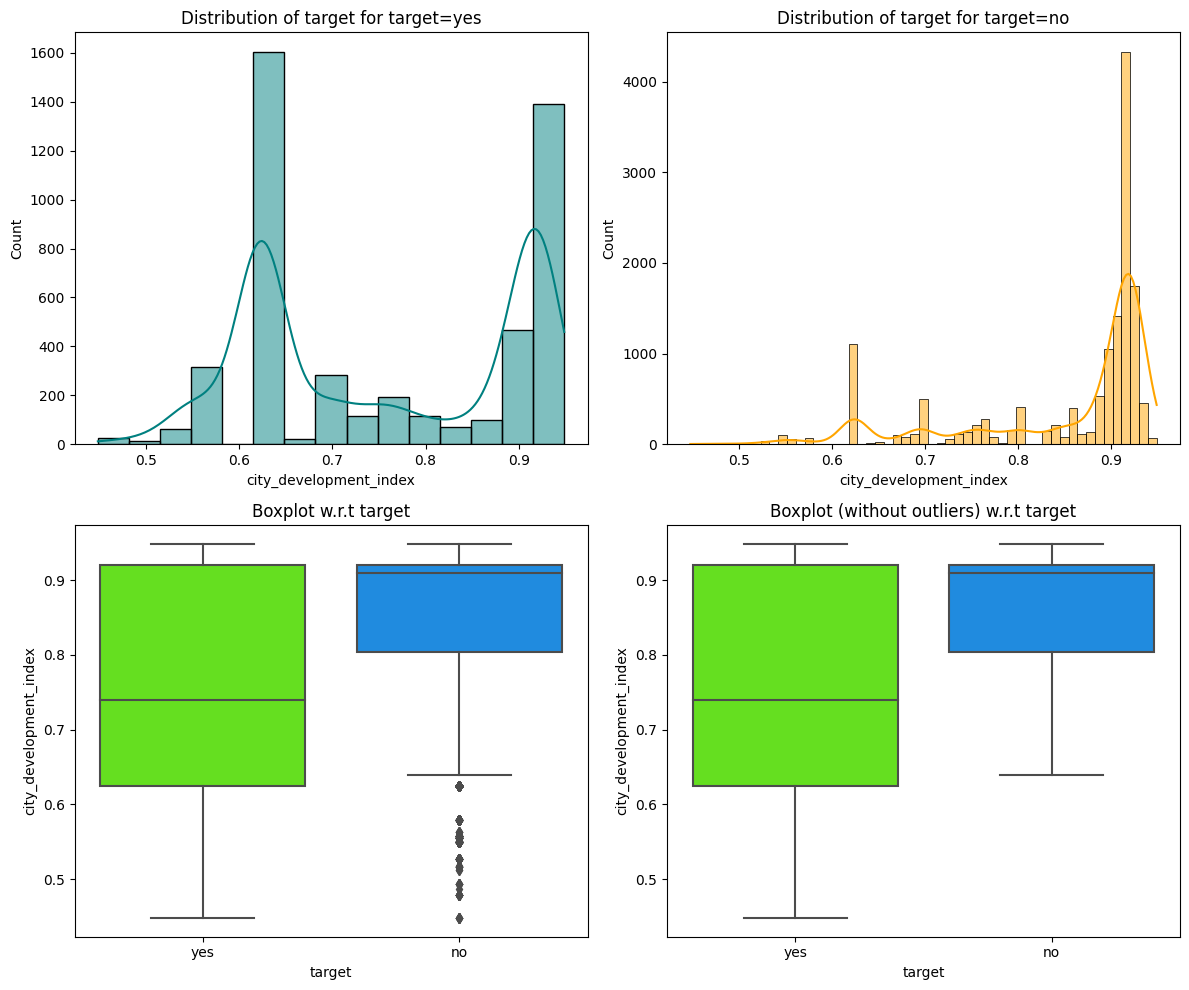

In [ ]:
distribution_plot_wrt_target(df, "city_development_index", "target")

* There's a stark difference between the enrollees looking for a job and an enrollee not looking for a job.
* Enrollee from a city with a higher development index would be less likely to look for a change in a job as compared to the enrollee coming from a city with a lower development index.
* Enrollees coming from cities with a low development index might be looking for better opportunities in metropolitan cities by upskilling themselves after undergoing the training.

**Target vs city**
* Cities 171,139, 155, and 42 show the highest percentage of enrollees looking for a job.
* Cities with the highest percentage of enrollees looking for a job might be from tier 2 or tier 3 cities looking for better opportunities.
* This column captures a clear difference between enrollees looking for a job and those who are not, it can act as an important predictor.

**Target vs gender**
* Females followed by other gender enrollees are the ones actively looking for a job change.
* Let's add the unknown as a category (in place of missing values) and see if there's a change in observations.

**Target vs relevant_experience**
* 35% of the enrollees who do not have relevant experience are the ones looking for a job change.
* Such enrollees might be freshers looking for opportunities.
* 20% of the enrollees who have relevant experience are also looking for a job change such enrollees after upskilling might be looking for new roles with the newly acquired skills.

**Target vs enrolled_university**
* There's a high portion of enrollees looking for a job change across all three categories.
* ~40% of the enrollees with full-time courses are looking for a job change.
* ~30% of the enrollees with part-time courses are looking for a job change.

**Target vs enrolled_university**
* There's a high proportion of enrollees looking for a job change across Graduates, Masters, and High Schooler categories.
* ~30% of the graduate enrollees are looking for a job change.
* 20% of the enrollees with a master's degree are looking for a job change.

**Target vs major_discipline**
* There's a high proportion of enrollees looking for a job change across all categories.

**Target vs experience**

target         no   yes    All
experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


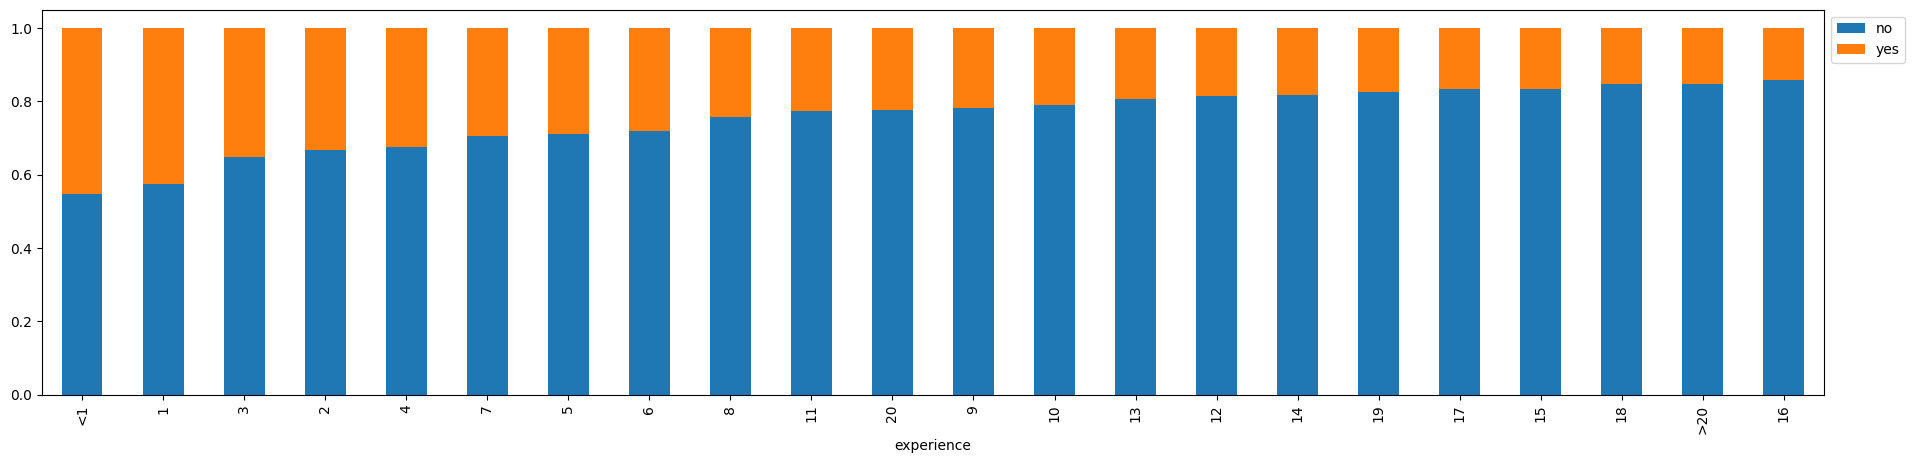

In [ ]:
stacked_barplot(df, "experience", "target")

* There's a high proportion of enrollees looking for a job change having less than 10 years of experience.
* <1 year will the freshers who after training would want to do a job in a relevant field.

**Target vs company_size**

target           no   yes    All
company_size                    
All           10853  2367  13220
50-99          2538   545   3083
100-500        2156   415   2571
10000+         1634   385   2019
10/49          1127   344   1471
<10            1084   224   1308
1000-4999      1128   200   1328
500-999         725   152    877
5000-9999       461   102    563
------------------------------------------------------------------------------------------------------------------------


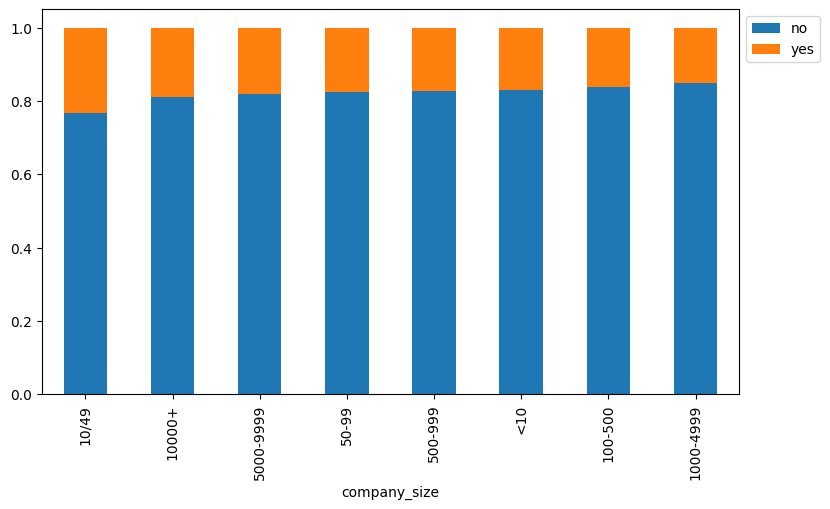

In [ ]:
stacked_barplot(df, "company_size", "target")

* ~20% of the enrollees who have been in companies of different sizes are looking for a job change.

**Target vs company_type**
* Enrollees from funded startups are the ones with less interest a possible reason being their startup just got funded, and they are looking for growth there and just want to upskill by undergoing the training.
* Across all types of companies/sectors ~20% of the enrollees are looking for a job change.

**Target vs training_hours**
* Training hours don't seem to have any impact on the target variable.


## Data Preprocessing

### Feature Engineering

In [ ]:
df["city"].nunique()

123

* There are 123 unique cities in data, we can reduce the levels by grouping them into 3 major categories:
  * Developed city - with city development index greater than 0.90
  * Developing city - with city development index between 0.74 and 0.90
  * Under-Developed city - with city development index between 0.4 and 0.74

We will bin the data after splitting into train/test/val to avoid data leakage.

In [ ]:
df["city_development_index"].describe()

count   19158.000
mean        0.829
std         0.123
min         0.448
25%         0.740
50%         0.903
75%         0.920
max         0.949
Name: city_development_index, dtype: float64

In [ ]:
# Discretize variable into equal-sized buckets based on quantiles
df["city"] = pd.qcut(
    df["city_development_index"],
    q=[0, 0.25, 0.5, 1],
    labels=["Under_Developed", "Developing", "Developed"],
)

In [ ]:
df["city"].value_counts()

Developed          9561
Under_Developed    4838
Developing         4759
Name: city, dtype: int64

* 123 unique values have been binned into 3 categories.

In [ ]:
data1 = df.copy()

In [ ]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
gender = {"Male": 0, "Female": 1, "Other": 2}
data1["gender"] = data1["gender"].map(gender)

enrolled_university = {"no_enrollment": 0, "Full time course": 1, "Part time course": 2}
data1["enrolled_university"] = data1["enrolled_university"].map(enrolled_university)

education_level = {
    "Graduate": 0,
    "Masters": 1,
    "High School": 2,
    "Phd": 3,
    "Primary School": 4,
}
data1["education_level"] = data1["education_level"].map(education_level)

major_discipline = {
    "STEM": 0,
    "Business Degree": 1,
    "Arts": 2,
    "Humanities": 3,
    "No Major": 4,
    "Other": 5,
}
data1["major_discipline"] = data1["major_discipline"].map(major_discipline)

experience = {
    "<1": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
    "20": 20,
    ">20": 21,
}
data1["experience"] = data1["experience"].map(experience)

company_type = {
    "Pvt Ltd": 0,
    "Funded Startup": 1,
    "Early Stage Startup": 2,
    "Other": 3,
    "Public Sector": 4,
    "NGO": 5,
}
data1["company_type"] = data1["company_type"].map(company_type)

company_size = {
    "<10": 0,
    "10/49": 1,
    "100-500": 2,
    "1000-4999": 3,
    "10000+": 4,
    "50-99": 5,
    "500-999": 6,
    "5000-9999": 7,
}
data1["company_size"] = data1["company_size"].map(company_size)

last_new_job = {"never": 0, "1": 1, "2": 2, "3": 3, "4": 4, ">4": 5}
data1["last_new_job"] = data1["last_new_job"].map(last_new_job)

In [ ]:
data1.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Developed,0.920,0.000,Has relevent experience,0.000,0.000,0.000,21.000,NaN,NaN,1.000,36,yes
1,Developing,0.776,0.000,No relevent experience,0.000,0.000,0.000,15.000,5.000,0.000,5.000,47,no
2,Under_Developed,0.624,NaN,No relevent experience,1.000,0.000,0.000,5.000,NaN,NaN,0.000,83,no
3,Developing,0.789,NaN,No relevent experience,NaN,0.000,1.000,0.000,NaN,0.000,0.000,52,yes
4,Developing,0.767,0.000,Has relevent experience,0.000,1.000,0.000,21.000,5.000,1.000,4.000,8,no


* Values have been encoded.

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Data Preparation for Modeling

In [ ]:
X = data1.drop(["target"], axis=1)
y = data1["target"].apply(lambda x: 1 if x == "yes" else 0)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(11494, 12) (3832, 12) (3832, 12)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 11494
Number of rows in validation data = 3832
Number of rows in test data = 3832


### Missing Value Treatment

In [ ]:
df.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64
------------------------------
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64
------------------------------
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size    

* All missing values have been treated.
* Let's inverse map the encoded values.

### Reverse Mapping for Encoded Variables

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(gender, "gender")
inverse_mapping(enrolled_university, "enrolled_university")
inverse_mapping(education_level, "education_level")
inverse_mapping(major_discipline, "major_discipline")
inverse_mapping(experience, "experience")
inverse_mapping(company_size, "company_size")
inverse_mapping(company_type, "company_type")
inverse_mapping(last_new_job, "last_new_job")

* Checking inverse mapped values/categories.

#### `Train Dataset`

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Developed          5725
Developing         2896
Under_Developed    2873
Name: city, dtype: int64
******************************
Male      10637
Female      743
Other       114
Name: gender, dtype: int64
******************************
Has relevent experience    8274
No relevent experience     3220
Name: relevent_experience, dtype: int64
******************************
no_enrollment       8535
Full time course    2250
Part time course     709
Name: enrolled_university, dtype: int64
******************************
Graduate          6977
Masters           2894
High School       1202
Phd                238
Primary School     183
Name: education_level, dtype: int64
******************************
STEM               10429
Humanities           382
Other                220
Business Degree      193
Arts                 146
No Major             124
Name: major_discipline, dtype: int64
******************************
>20    1977
4       844
5       835
3       807
6       738
2       678
7       625
1

#### `Validation Dataset`

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Developed          1945
Under_Developed     979
Developing          908
Name: city, dtype: int64
******************************
Male      3572
Female     221
Other       39
Name: gender, dtype: int64
******************************
Has relevent experience    2784
No relevent experience     1048
Name: relevent_experience, dtype: int64
******************************
no_enrollment       2827
Full time course     760
Part time course     245
Name: enrolled_university, dtype: int64
******************************
Graduate          2314
Masters            967
High School        408
Phd                 87
Primary School      56
Name: education_level, dtype: int64
******************************
STEM               3458
Humanities          130
Business Degree      71
Other                68
Arts                 56
No Major             49
Name: major_discipline, dtype: int64
******************************
>20    684
5      305
3      271
4      268
6      240
10     216
2      213
7      204
9     

#### `Test Dataset`

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Developed          1891
Under_Developed     986
Developing          955
Name: city, dtype: int64
******************************
Male      3520
Female     274
Other       38
Name: gender, dtype: int64
******************************
Has relevent experience    2734
No relevent experience     1098
Name: relevent_experience, dtype: int64
******************************
no_enrollment       2841
Full time course     747
Part time course     244
Name: enrolled_university, dtype: int64
******************************
Graduate          2307
Masters            960
High School        407
Phd                 89
Primary School      69
Name: education_level, dtype: int64
******************************
STEM               3418
Humanities          157
Other                93
Business Degree      63
Arts                 51
No Major             50
Name: major_discipline, dtype: int64
******************************
>20    625
4      291
5      290
3      276
6      238
2      236
9      212
10     210
7     

* Inverse mapping returned original labels.

### Creating Dummy Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(11494, 56) (3832, 56) (3832, 56)


* After encoding there are 56 columns.

# Model Building

## Model evaluation criterion

**Model can make wrong predictions as:**
1. Predicting an enrollee is looking for a job change but in reality, the enrollee is not looking for a change - Loss of resources
2. Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change  - Loss of opportunity

**Which case is more important?**
* Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change i.e. losing on a potential candidate as the candidate will not be targeted by the HR team when he should be targeted.

**How to reduce this loss i.e need to reduce False Negatives?**
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9340544312630844
Random forest: 0.9996510816468946
GBM: 0.5013956734124215
Adaboost: 0.30565247732030704
dtree: 1.0

Validation Performance:

Bagging: 0.41841004184100417
Random forest: 0.45502092050209203
GBM: 0.4602510460251046
Adaboost: 0.3023012552301255
dtree: 0.4236401673640167


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9341, Validation Score: 0.4184, Difference: 0.5156
Random forest: Training Score: 0.9997, Validation Score: 0.4550, Difference: 0.5446
GBM: Training Score: 0.5014, Validation Score: 0.4603, Difference: 0.0411
Adaboost: Training Score: 0.3057, Validation Score: 0.3023, Difference: 0.0034
dtree: Training Score: 1.0000, Validation Score: 0.4236, Difference: 0.5764


- GBM has the best performance followed by AdaBoost model as per the validation performance

### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2866
Before Oversampling, counts of label 'No': 8628 

After Oversampling, counts of label 'Yes': 8628
After Oversampling, counts of label 'No': 8628 

After Oversampling, the shape of train_X: (17256, 56)
After Oversampling, the shape of train_y: (17256,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9777468706536857
Random forest: 0.9991886879925823
GBM: 0.8426054705609644
Adaboost: 0.8237134909596662
dtree: 0.9982614742698191

Validation Performance:

Bagging: 0.4456066945606695
Random forest: 0.5523012552301255
GBM: 0.6841004184100419
Adaboost: 0.5481171548117155
dtree: 0.45397489539748953


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9777, Validation Score: 0.4456, Difference: 0.5321
Random forest: Training Score: 0.9992, Validation Score: 0.5523, Difference: 0.4469
GBM: Training Score: 0.8426, Validation Score: 0.6841, Difference: 0.1585
Adaboost: Training Score: 0.8237, Validation Score: 0.5481, Difference: 0.2756
dtree: Training Score: 0.9983, Validation Score: 0.4540, Difference: 0.5443


- GBM has the best performance on validation followed by XGB


### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2866
Before Under Sampling, counts of label 'No': 8628 

After Under Sampling, counts of label 'Yes': 2866
After Under Sampling, counts of label 'No': 2866 

After Under Sampling, the shape of train_X: (5732, 56)
After Under Sampling, the shape of train_y: (5732,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9633635729239358
Random forest: 0.9996510816468946
GBM: 0.7745987438939288
Adaboost: 0.7547103977669225
dtree: 0.9975575715282624

Validation Performance:

Bagging: 0.6621338912133892
Random forest: 0.7207112970711297
GBM: 0.7416317991631799
Adaboost: 0.7332635983263598
dtree: 0.6725941422594143


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9634, Validation Score: 0.6621, Difference: 0.3012
Random forest: Training Score: 0.9997, Validation Score: 0.7207, Difference: 0.2789
GBM: Training Score: 0.7746, Validation Score: 0.7416, Difference: 0.0330
Adaboost: Training Score: 0.7547, Validation Score: 0.7333, Difference: 0.0214
dtree: Training Score: 0.9976, Validation Score: 0.6726, Difference: 0.3250


- GBM has the best performance followed by AdaBoost model as per the validation performance

- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8185635842895452:
CPU times: user 1.01 s, sys: 172 ms, total: 1.19 s
Wall time: 35.7 s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.743,0.782,0.725,0.752


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.725,0.763,0.469,0.580


### Tuning  Gradient Boosting model with Undersampled Data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 0.5, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7787851700506534:
CPU times: user 3.29 s, sys: 357 ms, total: 3.64 s
Wall time: 2min 47s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.748,0.782,0.732,0.756


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.732,0.757,0.477,0.585


### Tuning Gradient Boosting model with Oversampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 1, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8913783062118998:
CPU times: user 4.58 s, sys: 690 ms, total: 5.27 s
Wall time: 5min 17s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.746,0.771,0.734,0.752


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.732,0.757,0.477,0.585


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.748,0.746,0.743
Recall,0.782,0.771,0.782
Precision,0.732,0.734,0.725
F1,0.756,0.752,0.752


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.732,0.732,0.725
Recall,0.757,0.757,0.763
Precision,0.477,0.477,0.469
F1,0.585,0.585,0.580


- AdaBoost model trained with undersampled data has generalised performance, so let's consider it as the best model.

In [ ]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.717,0.772,0.459,0.576


- The Adaboost model trained on undersampled data has given ~77% recall on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

### Feature Importance

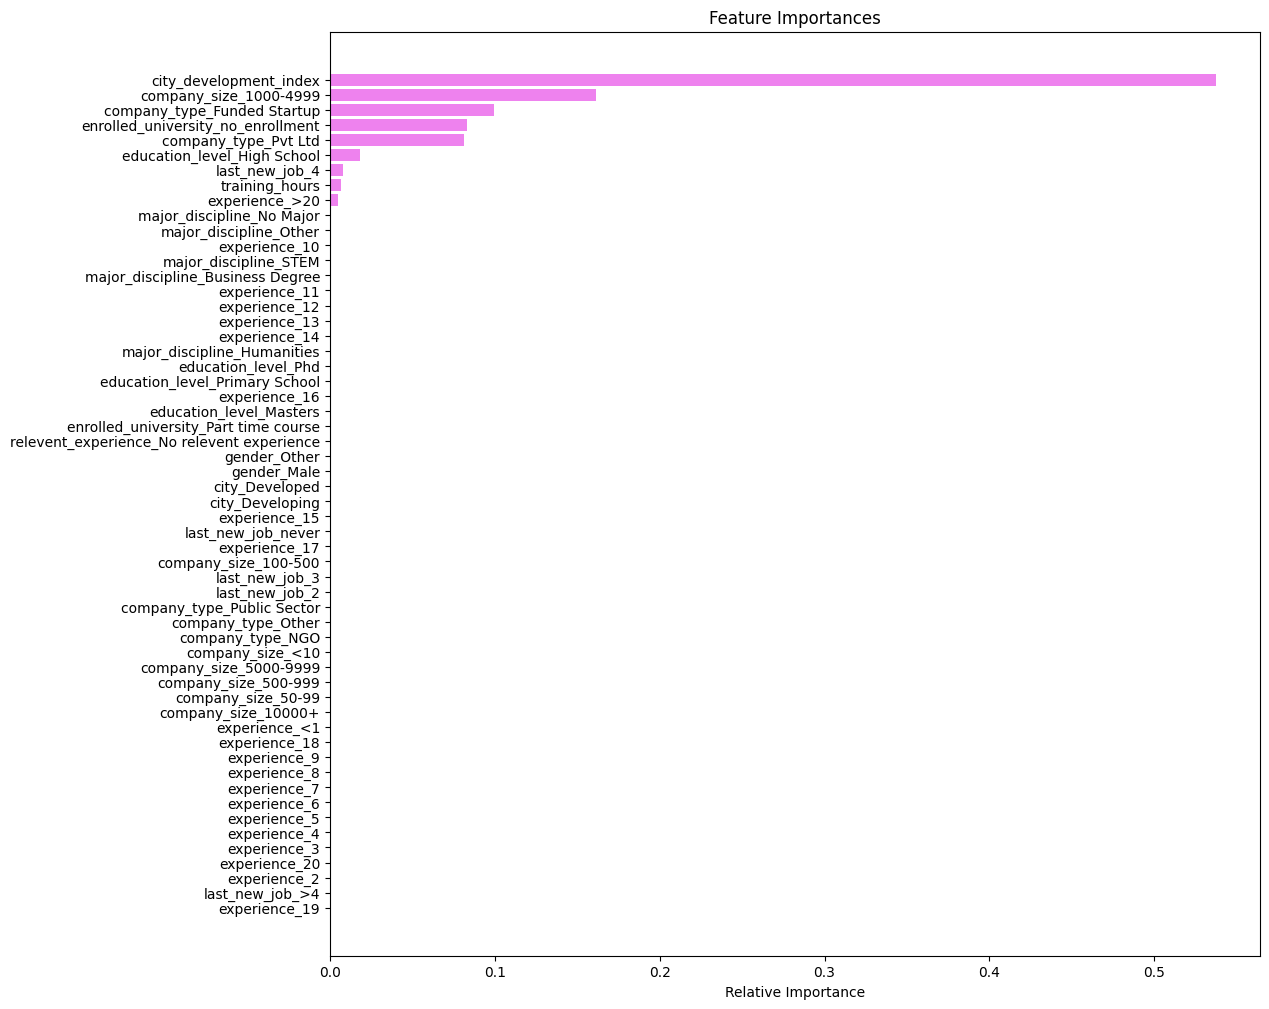

In [ ]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that city_development_index, company_size_1000-4999, comapnny_type_Pvt_Ltd are the most important features for making predictions

# Business Insights and Recommendations


* A person from an under-developed city would highly be looking for a switch and if an enrollee fulfills the criterion of job role they should be given higher preference than enrollees from other cities (developed and underdeveloped).
* To have a diverse culture in the company enrollees from other genders can be hired as they are more likely to look for a new job role.
* Enrollees with no relevant experience or no experience - generally freshers are more likely to look for a job and such enrollees on fulfilling the criterion of job should be the ones the company should focus on.
* Enrollees from early-stage startups, public sectors, or NGOs are more likely to switch to a new role as compared to the ones from the Private sector or Funded startups.
* Company size is an important aspect, those enrollees who have been in a company with a higher number of employees (1000-5000 or 10000+) are the ones who are actively looking for a switch - Such enrollees might now be looking for higher roles in team management, or it is much easier for such enrollees to fit into a workplace with so higher exposure to the working environment.

# <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on city_development_index

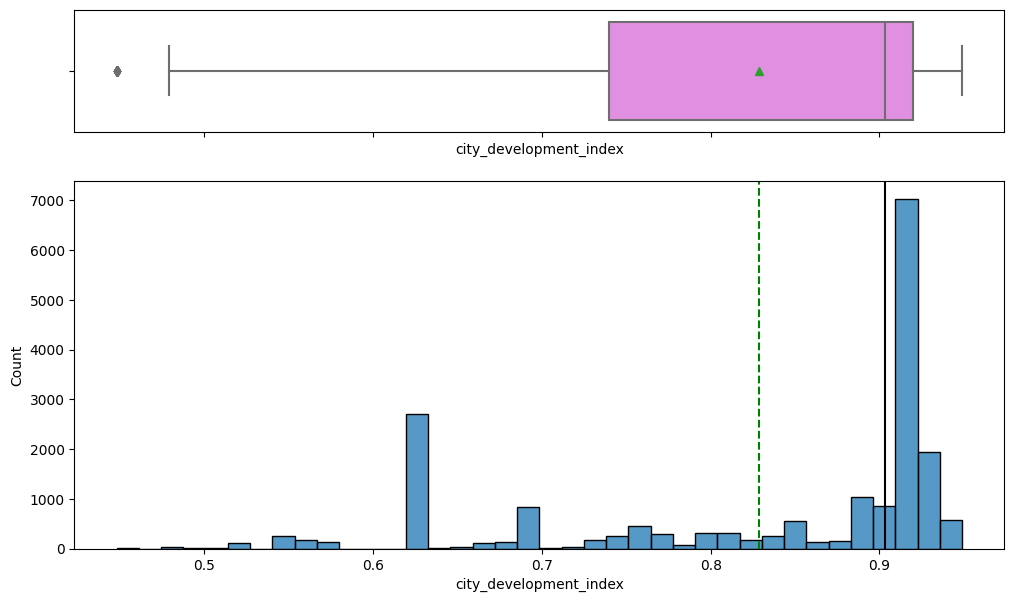

In [ ]:
histogram_boxplot(data, "city_development_index")

* Distribution of city_development_index is left-skewed.
* Cities with city_development_index less than ~0.45 are outliers - such cities might be underdeveloped or tier 3 cities.
* Let's explore it further.

In [ ]:
data[data["city_development_index"] < 0.45]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,city_33,0.448,NaN,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.000
4744,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,43,1.000
5010,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,never,73,1.000
5265,city_33,0.448,NaN,No relevent experience,NaN,High School,NaN,5,NaN,Pvt Ltd,never,86,1.000
5567,city_33,0.448,NaN,Has relevent experience,Part time course,Masters,STEM,6,NaN,NaN,1,18,1.000
6127,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,Public Sector,4,32,1.000
7724,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.000
7864,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,NaN,NaN,>4,74,0.000
9134,city_33,0.448,NaN,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.000
10401,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.000


* All such records with a city development index less than 0.45 are from city_33, hence they seem to represent true pattern and we don't need to treat them as outliers.

### Observations on training_hours

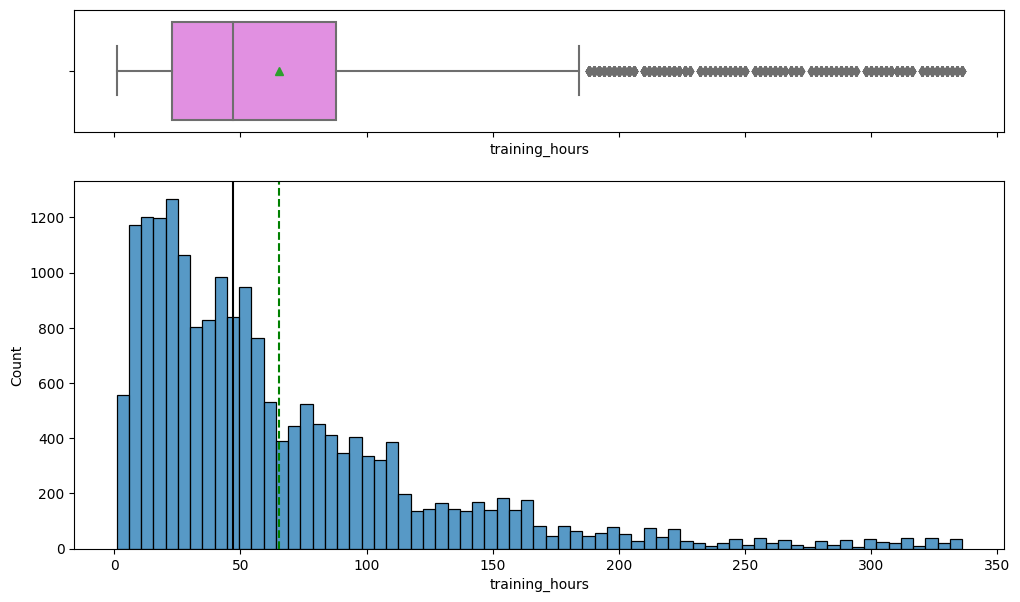

In [ ]:
histogram_boxplot(data, "training_hours")

* Distribution of training_hours is right-skewed with many outliers.
* From the boxplot, we can see that enrollees with more than ~175hrs of training are outliers.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on gender

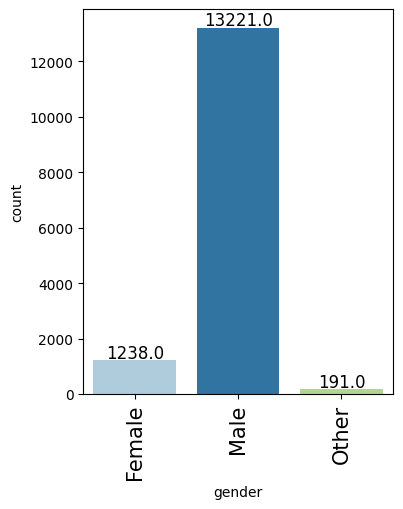

In [ ]:
labeled_barplot(data, "gender")

* 69% of the enrollees are males.

### Observations on relevant_experience

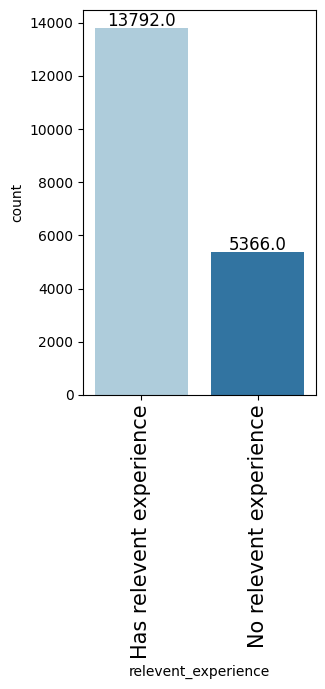

In [ ]:
labeled_barplot(data, "relevent_experience")

* 72% of the enrollees have some relevant experience.

### Observations on enrolled_university

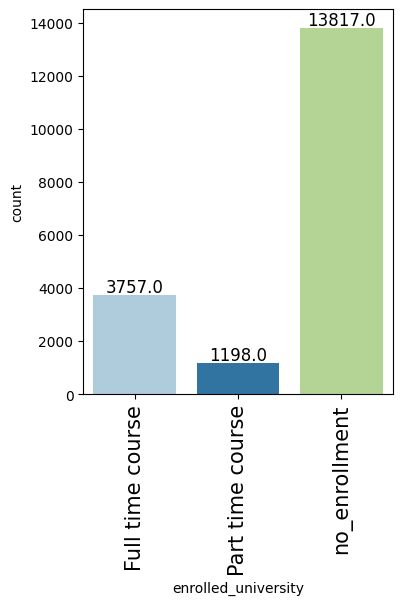

In [ ]:
labeled_barplot(data, "enrolled_university")

* 72.1% of the enrollees had no enrollment in universities followed by 19.6% of the enrollees with the full-time course.

### Observations on education_level

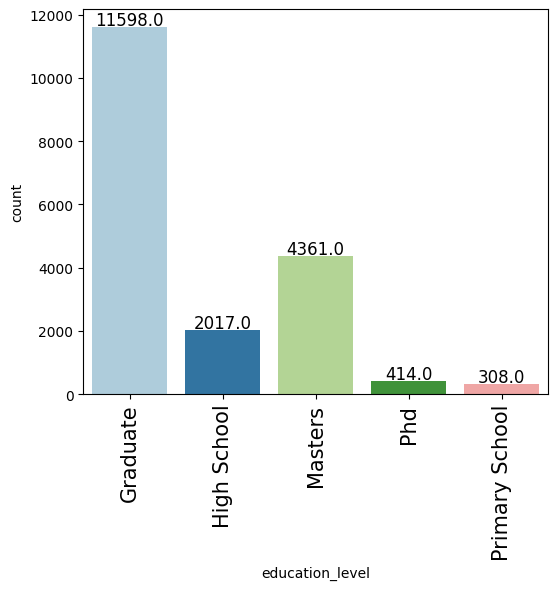

In [ ]:
labeled_barplot(data, "education_level")

* 60.5% of the enrollees are graduates, followed by 22.8% of the enrollees having Masters degree.

### Observations on major_discipline

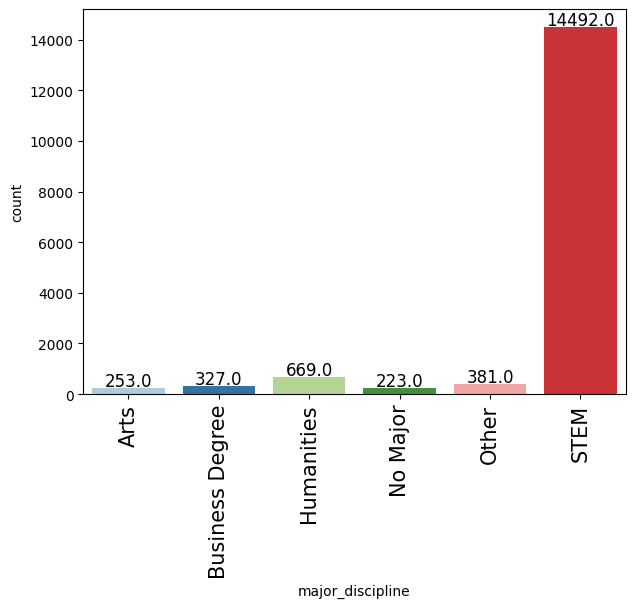

In [ ]:
labeled_barplot(data, "major_discipline")

* 75.5% of the enrollees have STEM as their major discipline. STEM includes programs in science, technology, engineering, and mathematics.

### Observations on company_size

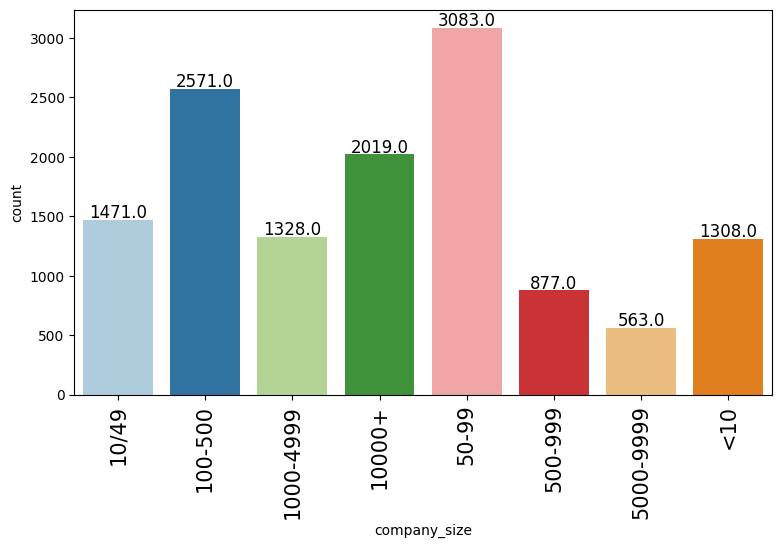

In [ ]:
labeled_barplot(data, "company_size")

* 16.1% of the enrollees have worked in a company with 50-99 employees, followed by 13.4% of the enrollees who have worked in a company with 100-500.

### Observations on company_type

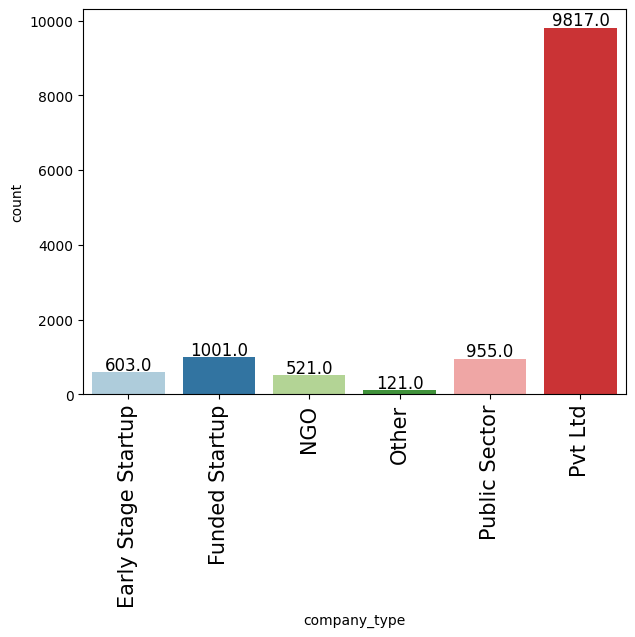

In [ ]:
labeled_barplot(data, "company_type")

* 51.2% of the enrollees have worked in private companies, followed by 8.3% enrollees in startups.

### Observations on last_new_job

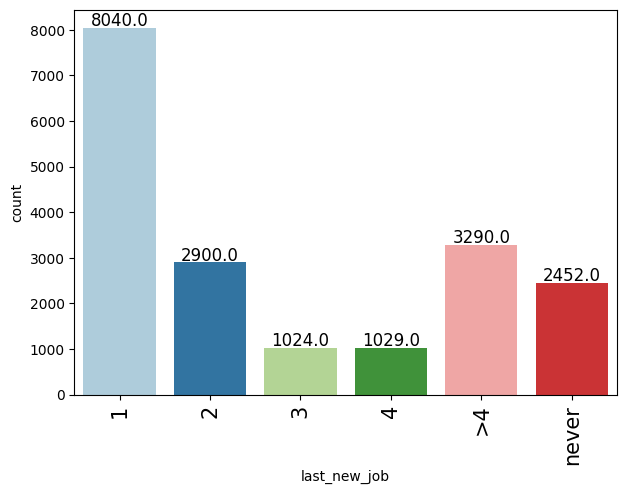

In [ ]:
labeled_barplot(data, "last_new_job")

* 42% of the enrollees have a difference of 1 year between their current and previous job followed by 17.2% of the enrollees with more than 4 years of difference.
* Never here can mean that enrollee has never worked before(freshers) or is not working right now.

### Bivariate Analysis

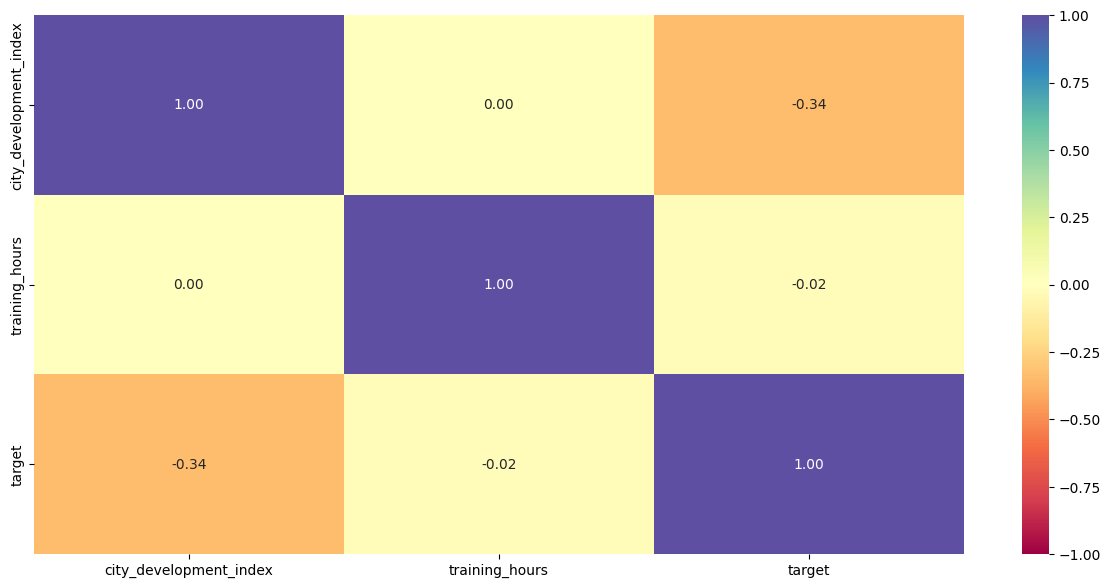

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no strong correlation either with the target or between any independent variable.
* City development index has a negative relation with the target.

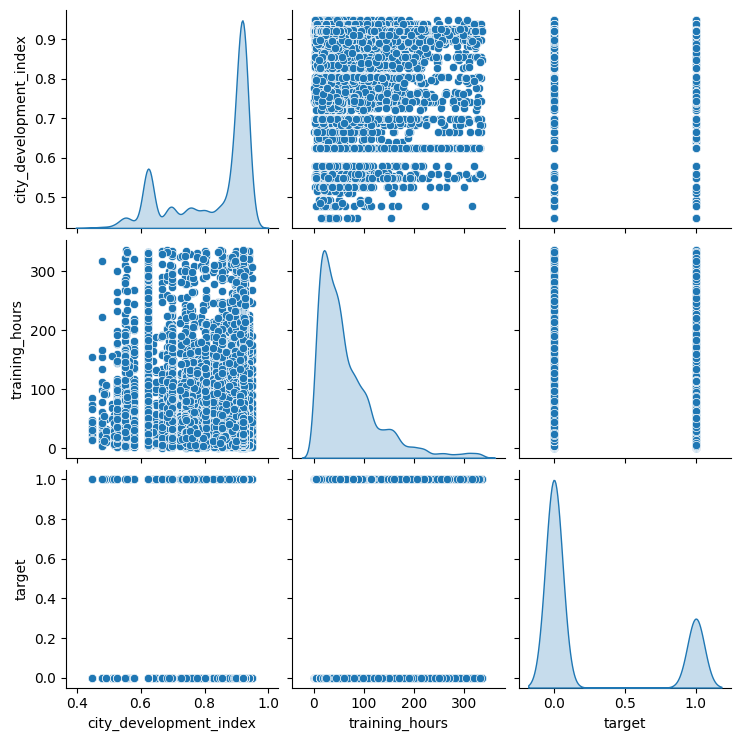

In [ ]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [ ]:
data["target"].replace(1, "yes", inplace=True)
data["target"].replace(0, "no", inplace=True)

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### target vs city

target       no   yes    All
city                        
All       14381  4777  19158
city_21    1105  1597   2702
city_103   3427   928   4355
city_160    646   199    845
city_16    1354   179   1533
...         ...   ...    ...
city_129      3     0      3
city_8        4     0      4
city_39      11     0     11
city_111      3     0      3
city_2        7     0      7

[124 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


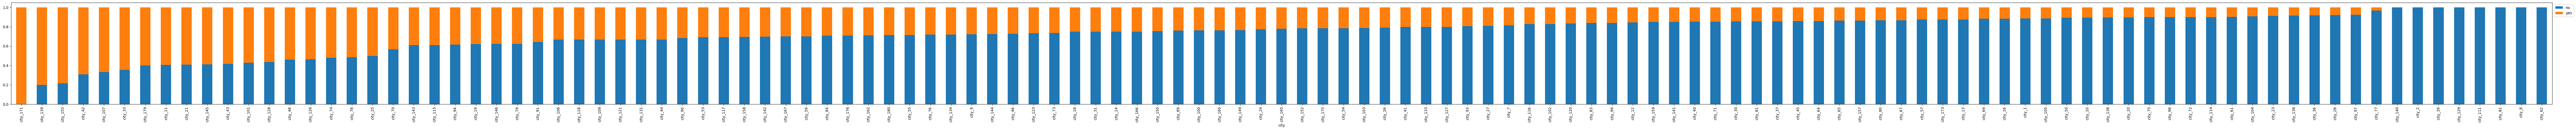

In [ ]:
stacked_barplot(data, "city", "target")

* Cities 171,139, 155, and 42 show the highest percentage of enrollees looking for a job.
* Cities with the highest percentage of enrollees looking for a job might be from tier 2 or tier 3 cities looking for better opportunities.
* This column captures a clear difference between enrollees looking for a job and those who are not, it can act as an important predictor.

### target vs gender

target     no   yes    All
gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


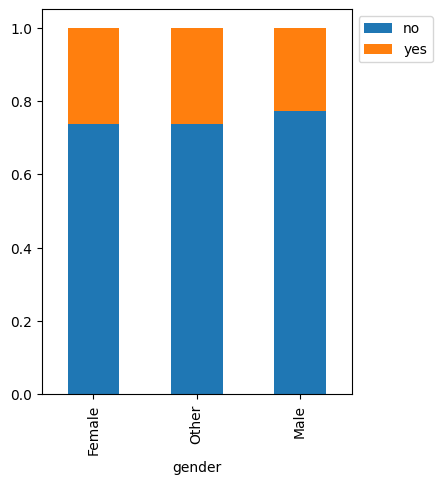

In [ ]:
stacked_barplot(data, "gender", "target")

* Females followed by other gender enrollees are the ones actively looking for a job change.
* Let's add the unknown as a category (in place of missing values) and see if there's a change in observations.

In [ ]:
data["gender"] = data["gender"].replace(np.nan, "unknown")

target      no   yes    All
gender                     
All      14381  4777  19158
Male     10209  3012  13221
unknown   3119  1389   4508
Female     912   326   1238
Other      141    50    191
------------------------------------------------------------------------------------------------------------------------


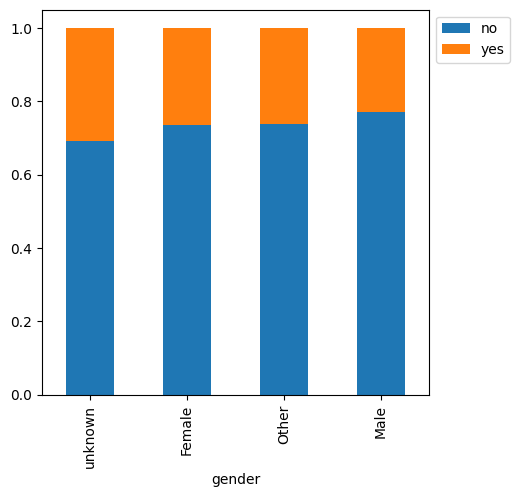

In [ ]:
stacked_barplot(data, "gender", "target")

* 'Unknown' gender has the most percentage of enrollees looking for a job change.

### target vs relevant_experience

target                      no   yes    All
relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


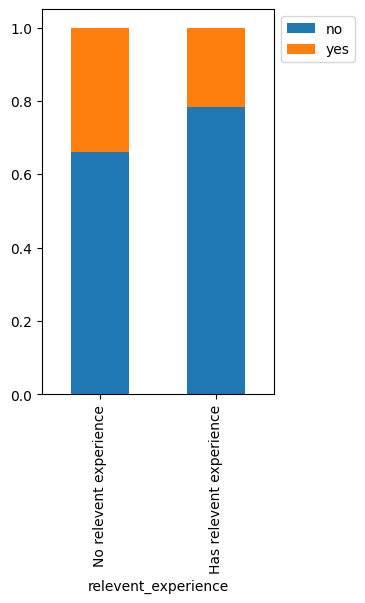

In [ ]:
stacked_barplot(data, "relevent_experience", "target")

* 35% of the enrollees who do not have relevant experience are the ones looking for a job change.
* Such enrollees might be freshers looking for opportunities.
* 20% of the enrollees who have relevant experience are also looking for a job change such enrollees after upskilling might be looking for new roles with the newly acquired skills.

### target vs enrolled_university

target                  no   yes    All
enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


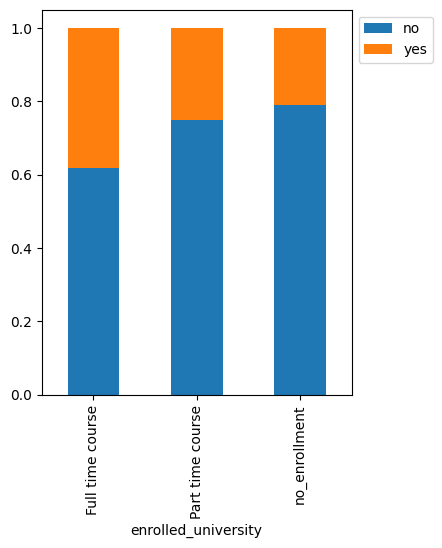

In [ ]:
stacked_barplot(data, "enrolled_university", "target")

* There's a high portion of enrollees looking for a job change across all three categories.
* ~40% of the enrollees with full-time courses are looking for a job change.
* ~30% of the enrollees with part-time courses are looking for a job change.

### target vs enrolled_university

target              no   yes    All
education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


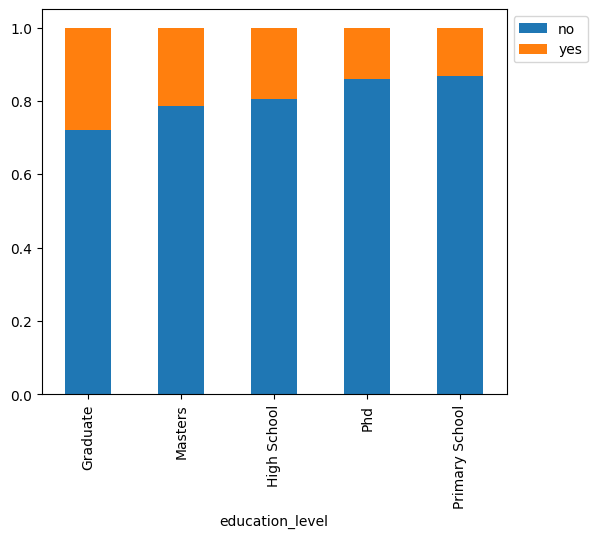

In [ ]:
stacked_barplot(data, "education_level", "target")

* There's a high proportion of enrollees looking for a job change across Graduates, Masters, and High Schooler categories.
* ~30% of the graduate enrollees are looking for a job change.
* 20% of the enrollees with a master's degree are looking for a job change.

### target vs major_discipline

target               no   yes    All
major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


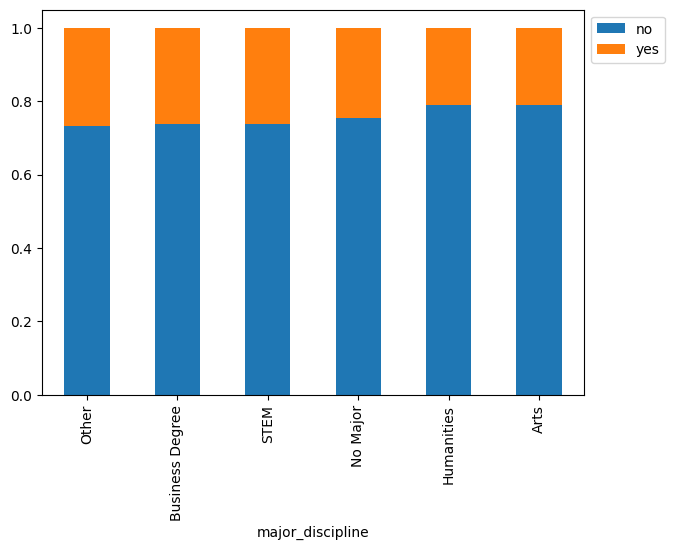

In [ ]:
stacked_barplot(data, "major_discipline", "target")

* There's a high proportion of enrollees looking for a job change across all categories.

### target vs experience

target         no   yes    All
experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


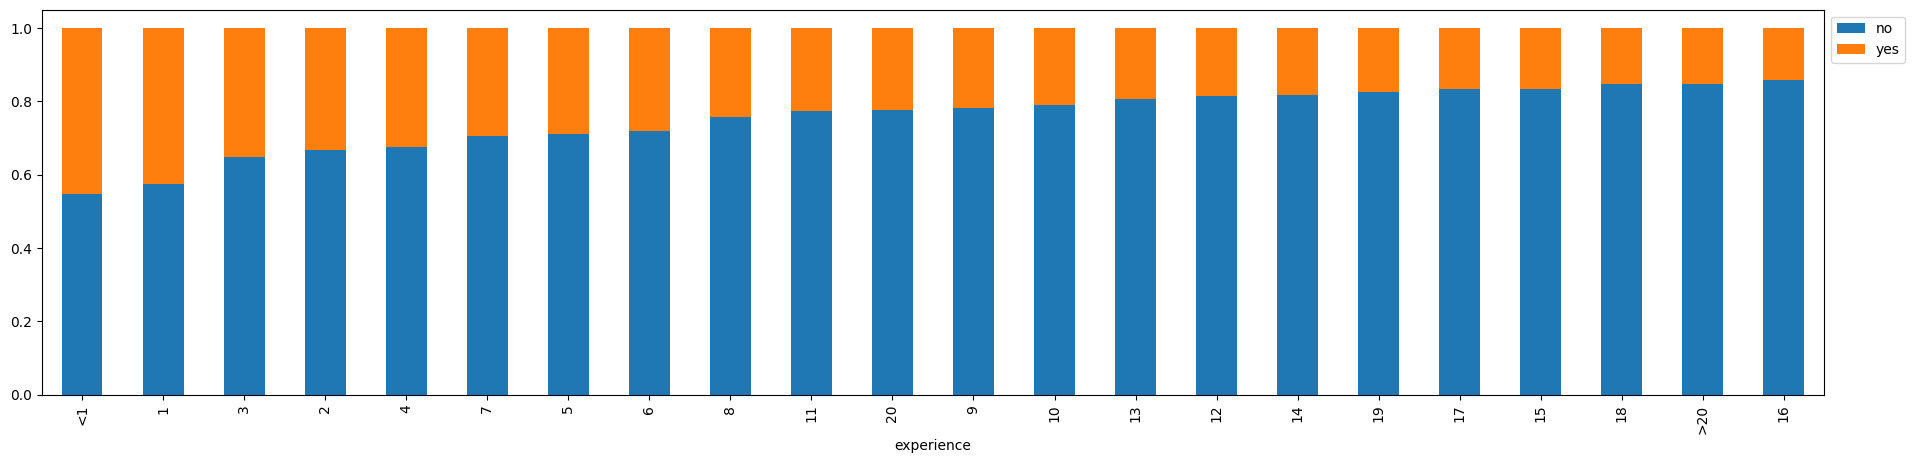

In [ ]:
stacked_barplot(data, "experience", "target")

* There's a high proportion of enrollees looking for a job change having less than 10 years of experience.
* <1 year will the freshers who after training would want to do a job in a relevant field.

### target vs company_size

target           no   yes    All
company_size                    
All           10853  2367  13220
50-99          2538   545   3083
100-500        2156   415   2571
10000+         1634   385   2019
10/49          1127   344   1471
<10            1084   224   1308
1000-4999      1128   200   1328
500-999         725   152    877
5000-9999       461   102    563
------------------------------------------------------------------------------------------------------------------------


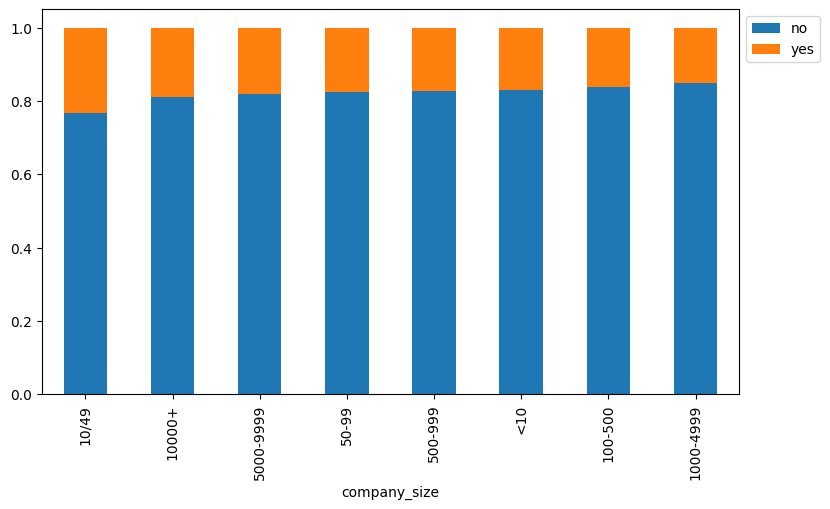

In [ ]:
stacked_barplot(data, "company_size", "target")

* ~20% of the enrollees who have been in companies of different sizes are looking for a job change.

### target vs company_type

target                  no   yes    All
company_type                           
All                  10625  2393  13018
Pvt Ltd               8042  1775   9817
Public Sector          745   210    955
Early Stage Startup    461   142    603
Funded Startup         861   140   1001
NGO                    424    97    521
Other                   92    29    121
------------------------------------------------------------------------------------------------------------------------


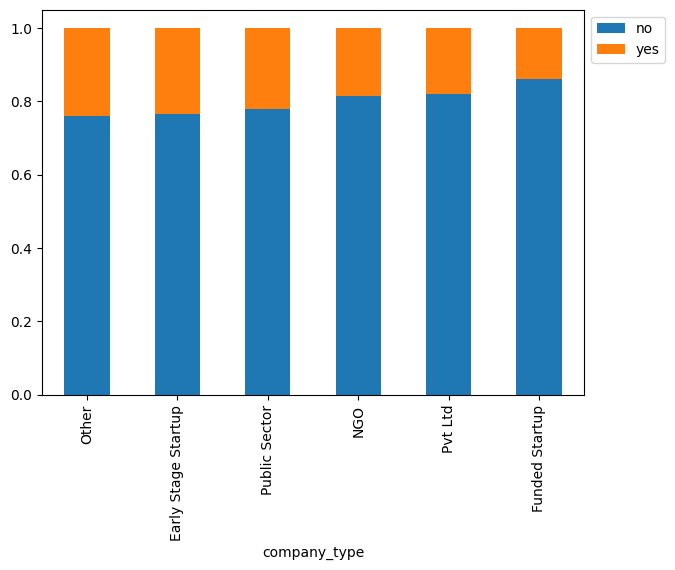

In [ ]:
stacked_barplot(data, "company_type", "target")

* Enrollees from funded startups are the ones with less interest a possible reason being their startup just got funded, and they are looking for growth there and just want to upskill by undergoing the training.
* Across all types of companies/sectors ~20% of the enrollees are looking for a job change.

### target vs last_new_job

target           no   yes    All
last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


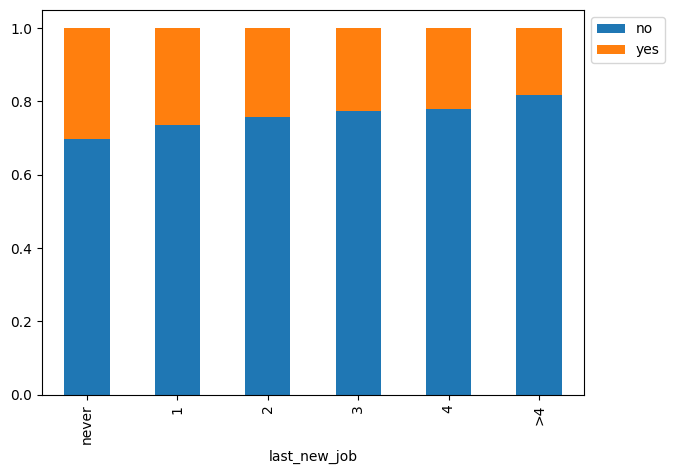

In [ ]:
stacked_barplot(data, "last_new_job", "target")

* Our earlier thought of 'never' representing freshers or those who are not working right now seems true as they are the ones most interested in a job change(looking for a start).

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### target vs training_hours

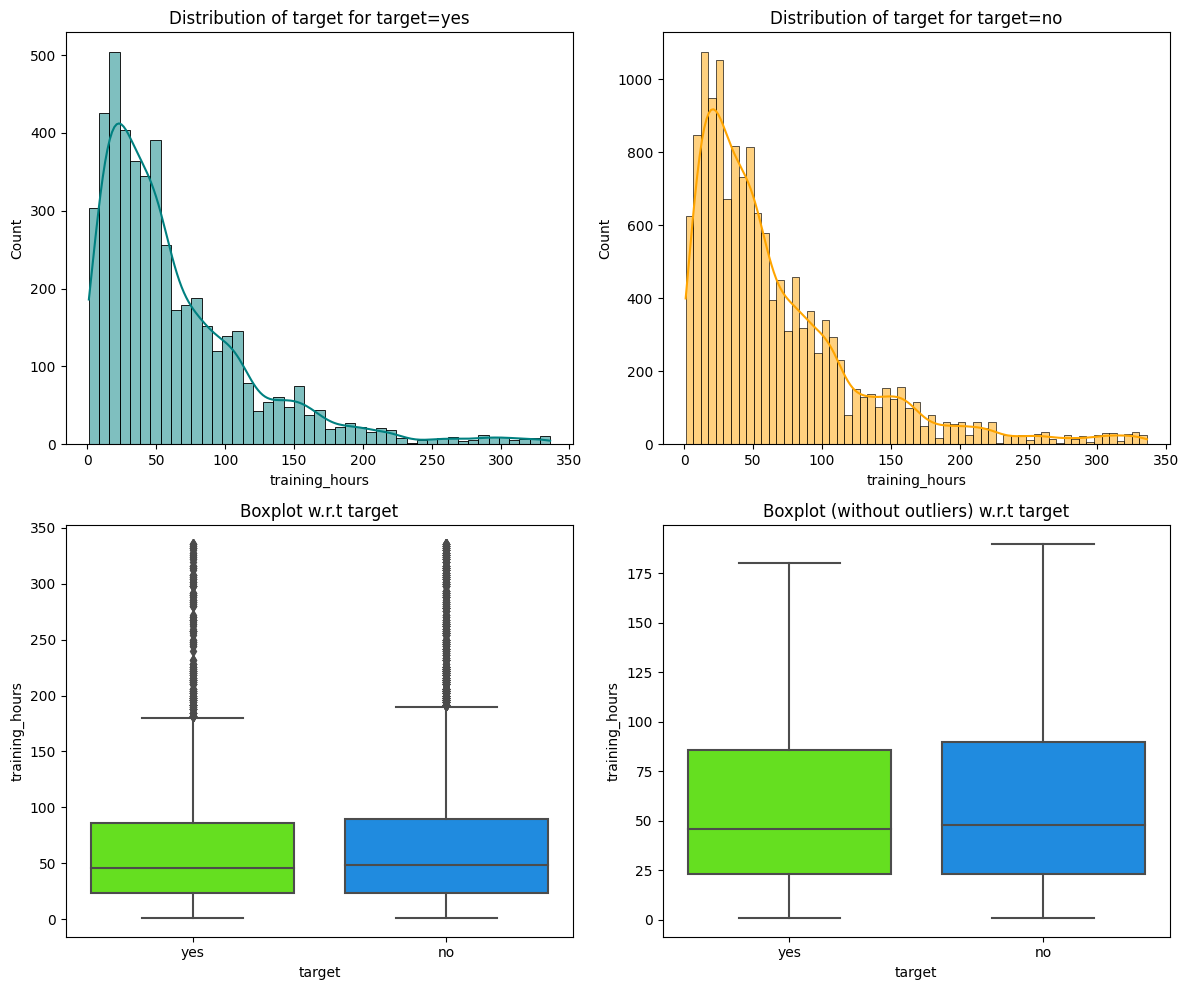

In [ ]:
distribution_plot_wrt_target(data, "training_hours", "target")

* Training hours don't seem to have any impact on the target variable.

### target vs city_development_index

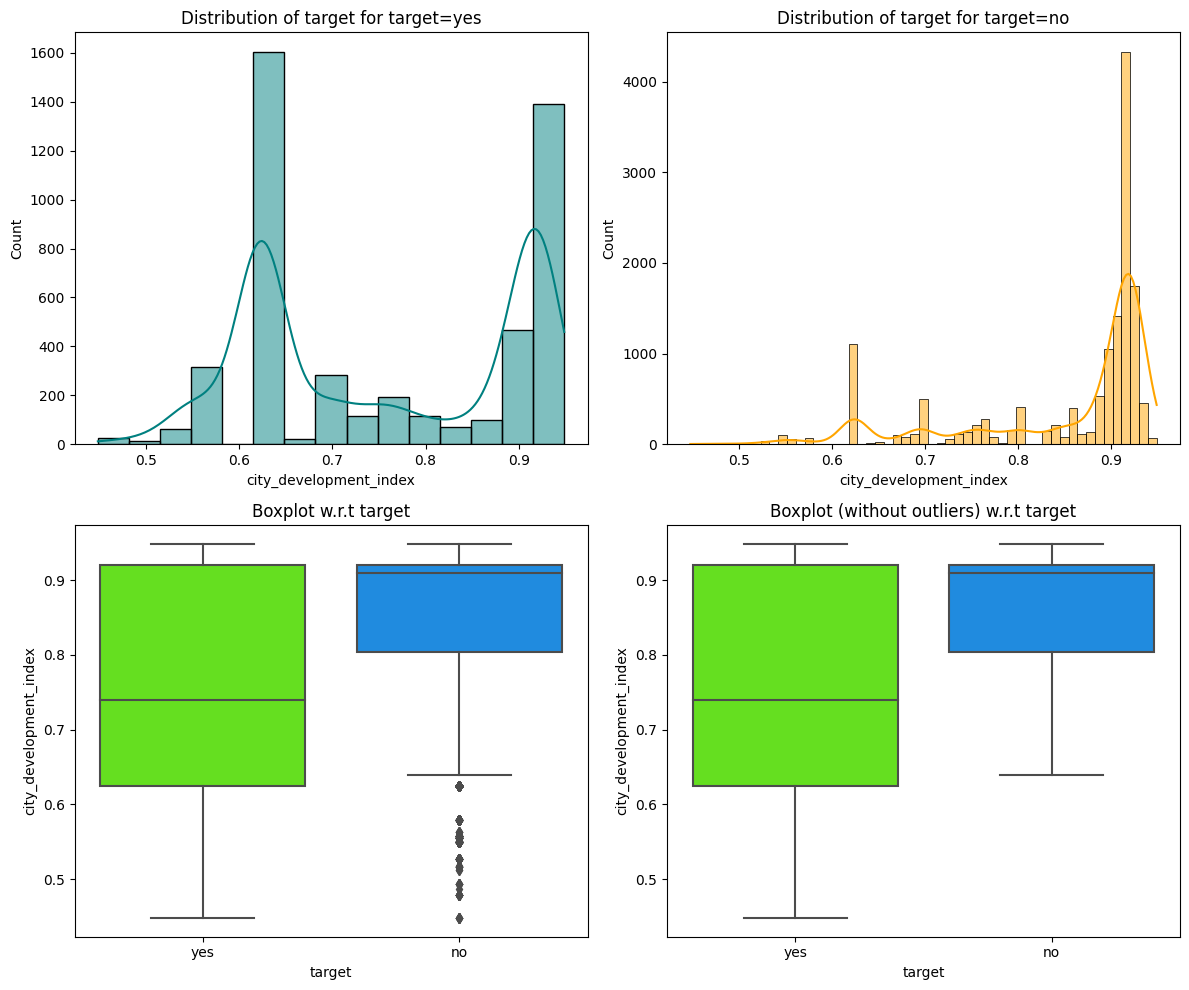

In [ ]:
distribution_plot_wrt_target(data, "city_development_index", "target")

* There's a stark difference between the enrollees looking for a job and an enrollee not looking for a job.
* Enrollee from a city with a higher development index would be less likely to look for a change in a job as compared to the enrollee coming from a city with a lower development index.
* Enrollees coming from cities with a low development index might be looking for better opportunities in metropolitan cities by upskilling themselves after undergoing the training.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

___